# 前期後半の課題

- 講義の後半で毎回、課題に取り組む。
- 締め切り
    - 第1回~第7回の課題を、**6/4(第7回目)の午後11時59分**までに提出すること。
    - 第9回~第14回の課題を、**9/3(第14回目)の講義終了**までに提出すること。
- 第14回の課題を前期の試験とします。
- 提出は、ひとつのJupyterNotebook(.ipynbファイル)でお願いします。
- 部分点を付けるので、完答していなくても出来たところまで記述してください。

## 第9回

テーブルデータに対して、全結合層のニューラルネットワークで分類モデルを作成する。テーブルデータには、Pythonライブラリの`seaborn.load_dataset("penguins")`を用いる。モデルの説明変数を `['island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex']`、目的変数を`species`とする。

### 問1

データの前処理を行い、全結合層のニューラルネットワークモデルで学習を行うためのデータセットを作成しなさい。

In [2]:
# データセットを準備
import seaborn
df = seaborn.load_dataset("penguins")

In [3]:
# 欠損行を調べる
df[df.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [4]:
# 欠損行を削除
df.dropna(inplace=True)
df[df.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [5]:
# ラベルエンコード
from sklearn.preprocessing import LabelEncoder

for col in ["species", "island", "sex"]:
    df[col] = LabelEncoder().fit_transform(df[col])
df

f:\deep-learning\.venv\Lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


In [6]:
df.describe()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.918919,0.651652,43.992793,17.164865,200.966967,4207.057057,0.504505
std,0.889718,0.714715,5.468668,1.969235,14.015765,805.215802,0.500732
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,0.000000,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,1.000000,1.000000,44.500000,17.300000,197.000000,4050.000000,1.000000
75%,2.000000,1.000000,48.600000,18.700000,213.000000,4775.000000,1.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000


In [7]:
# 正規化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaler.fit_transform(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
df.describe()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333.000000,333.000000,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,333.000000
mean,0.918919,0.651652,3.840772e-16,6.401286e-16,2.133762e-16,-1.707010e-16,0.504505
std,0.889718,0.714715,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,0.500732
min,0.000000,0.000000,-2.177987e+00,-2.067291e+00,-2.069852e+00,-1.874435e+00,0.000000
25%,0.000000,0.000000,-8.227879e-01,-7.958519e-01,-7.836512e-01,-8.172292e-01,0.000000
50%,1.000000,1.000000,9.288742e-02,6.872642e-02,-2.834620e-01,-1.953432e-01,1.000000
75%,2.000000,1.000000,8.437412e-01,7.807321e-01,8.598276e-01,7.063915e-01,1.000000
max,2.000000,2.000000,2.858227e+00,2.204743e+00,2.146028e+00,2.603144e+00,1.000000


### 問2

全結合層のニューラルネットワークモデルを定義しなさい。そして、訓練していない状態でテストデータを入力し、正答率を算出しなさい。

In [8]:
# 訓練データ, バリデーション, テストデータに分割

import torch
from torch.utils.data import TensorDataset, DataLoader

ds_x = torch.Tensor(df.drop(columns="species").to_numpy())
ds_y = torch.Tensor(df["species"].to_numpy())
ds = TensorDataset(ds_x, ds_y)

ds_train, ds_val, ds_test = torch.utils.data.random_split(dataset=ds, lengths=[233, 50, 50], generator=torch.Generator().manual_seed(42))

batch_size = 32
ds_train = DataLoader(ds_train, batch_size=batch_size)
ds_val = DataLoader(ds_val, batch_size=batch_size)
ds_test = DataLoader(ds_test, batch_size=batch_size)

In [9]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [10]:
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(6, 6)
        self.fc2 = nn.Linear(6, 3)

    def forward(self, x):
        x = nn.functional.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (fc1): Linear(in_features=6, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=3, bias=True)
)


In [11]:
correct = 0                                                     # 正しい予測の数
total = 0                                                       # テストデータの総数
model.eval()
with torch.no_grad():
    for x, y in ds_test:                                        # テストデータセット（ds_test）からデータ（x）とラベル（y）をバッチごとに取り出す
        outputs = model(x.to(device))                           # 入力データをモデルに渡して予測を取得
        _, predicted = torch.max(outputs, 1)                    # 最大値のインデックスを取得し、予測クラスとする
        print(predicted)
        total += y.size(0)                                      # テストデータの総数を更新
        correct += (predicted == y.to(device)).sum().item()     # 正しい予測の数を更新

accuracy = 100 * correct / total                                # 正答率を計算（正しい予測の割合をパーセンテージで表す）
print(f'正答率: {accuracy:.2f}%')                               # 正答率を表示


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
正答率: 48.00%


### 問3

問2のニューラルネットワークモデルを問1のデータセットで訓練しなさい。訓練後、問2と同様にテストデータを入力し、正答率を算出しなさい。ただし、正答率があがるようにunit数を変更するなど、モデルのアーキテクチャを工夫し、過学習を防ぐために学習中の損失関数をプロットしなさい。

In [12]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [13]:
def train(dataloader, model, loss_fn, optimizer):
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y.long())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


def val(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(correct, test_loss)

In [14]:
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}")
    train(ds_train, model, loss_fn, optimizer)
    val(ds_val, model, loss_fn)

Epoch 1
0.52 0.9906101524829865
Epoch 2
0.52 0.9713082015514374
Epoch 3
0.6 0.9522698223590851
Epoch 4
0.68 0.933482438325882
Epoch 5
0.76 0.9149410128593445
Epoch 6
0.8 0.8966459035873413
Epoch 7
0.8 0.8786009252071381
Epoch 8
0.8 0.860813170671463
Epoch 9
0.8 0.8432910740375519
Epoch 10
0.8 0.8260441422462463
Epoch 11
0.8 0.809082567691803
Epoch 12
0.8 0.7924164235591888
Epoch 13
0.8 0.776055783033371
Epoch 14
0.8 0.7600097954273224
Epoch 15
0.8 0.7442872822284698
Epoch 16
0.8 0.7288958728313446
Epoch 17
0.8 0.7138421833515167
Epoch 18
0.8 0.6991315186023712
Epoch 19
0.8 0.6847681105136871
Epoch 20
0.8 0.6707545816898346
Epoch 21
0.8 0.6570923030376434
Epoch 22
0.8 0.6437810659408569
Epoch 23
0.8 0.6308194994926453
Epoch 24
0.82 0.6182047128677368
Epoch 25
0.84 0.6059328019618988
Epoch 26
0.84 0.593998372554779
Epoch 27
0.84 0.5823952555656433
Epoch 28
0.84 0.5711162686347961
Epoch 29
0.84 0.5601533949375153
Epoch 30
0.84 0.549498051404953
Epoch 31
0.86 0.5391410291194916
Epoch 32
0.

In [15]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for x, y in ds_test:
        outputs = model(x.to(device))
        _, predicted = torch.max(outputs, 1)
        total += y.size(0)
        correct += (predicted == y.to(device)).sum().item()
        

accuracy = 100 * correct / total
print(f'正答率: {accuracy:.2f}%')

正答率: 98.00%


## 第11回

### 問1

データセット`Fashion-MNIST`に対して、畳み込みニューラルネットワークの画像分類モデルを作成しなさい。
- 【データセット】Fashion-MNIST: https://github.com/zalandoresearch/fashion-mnist
- 【参考】Fashion-MNIST を全結合ニューラルネットワークで分類したモデル： https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

また、ニューラルネットの全結合層と畳み込み層は次のように実装しなさい。
- 全結合層: 線形変換 → ReLU
- 畳み込み層: 畳み込み → ReLU → Pooling

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# データセットの前処理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# データセットのダウンロードと読み込み
trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# 畳み込みニューラルネットワークの定義
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(12*12*64, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# モデル、損失関数、オプティマイザの設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 訓練関数の定義
def train(trainloader, model, loss_fn, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(trainloader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

# モデルの訓練
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}")
    train(trainloader, model, loss_fn, optimizer)

# モデルの評価
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data, target in testloader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'正答率: {accuracy:.2f}%')


Epoch 1


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x1600 and 9216x128)

### 問2

分類してみたい画像データの候補をあげなさい。

## 第12回

### 問1

強化学習のライブラリ`https://github.com/Farama-Foundation/Gymnasium`をインストールして、Pythonファイルで`import`できることを確認しなさい。次回の講義で使います。

In [17]:
# 1. 強化学習のライブラリのインストール・importできることの確認
import gymnasium as gym
env = gym.make("CartPole-v1")

observation, info = env.reset(seed=42)
for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
env.close()

### 問2

強化学習を行ってみたいタスクをあげなさい。`https://gymnasium.farama.org`の`Environments`を参考にしてもよい。

- ブラックジャック

### 問3

全結合層ニューラルネットについて、下記の例で確認しなさい。
- https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

### 問4

畳み込みニューラルネットについて、下記の例で確認しなさい。
- https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

## 第13回

### 問1

全結合層で、入力を $6$ 次元ベクトル、出力を $12$ 次元ベクトルとなるように実装し、乱数で実際に動かしなさい。実装には`torch.nn.Linear`を使いなさい。

In [18]:
import torch
import torch.nn as nn
# モデルをインスタンス (in_features=6, out_features=12)
m = nn.Linear(6, 12)
# 6次元ベクトルの乱数
input = torch.randn(6)

output = m(input)
print(output.size())
print(output)

torch.Size([12])
tensor([ 0.2909, -0.2837, -0.2537,  0.0781,  0.1970, -0.2189,  0.4765,  0.8330,
         0.0639,  0.3398, -0.7755,  0.0535], grad_fn=<ViewBackward0>)


### 問2

畳み込み層で、入力を " $3$ チャンネル, $28 \times 28$ の $2$ 次元データ", カーネルサイズを $(4, 4)$ , 出力チャンネルを $1$ チャンネルとなるように実装し、乱数で実際に動かしなさい。実装には`torch.nn.Conv2d`を使いなさい。

In [19]:
m = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=(4, 4))
input = torch.randn(3, 28, 28)
output = m(input)
print(input.size())

torch.Size([3, 28, 28])


In [20]:
print(output.size())
print(output)

torch.Size([1, 25, 25])
tensor([[[ 6.7094e-01, -7.4983e-01, -5.9938e-01, -3.8628e-01,  1.9858e-01,
          -3.0602e-01, -4.0684e-01, -3.7129e-01, -7.4466e-01,  4.0169e-01,
          -1.0787e+00,  6.4218e-02, -5.0485e-01,  1.3385e-01,  6.3664e-01,
           1.2247e-01, -7.6618e-01, -3.3457e-01, -3.7686e-01, -3.1378e-01,
          -1.7049e-01,  7.4537e-01, -7.8682e-01,  4.7755e-01, -7.5021e-01],
         [-8.6289e-02, -9.2574e-01, -3.3437e-01,  4.5345e-02, -5.3161e-01,
          -5.6287e-01, -7.1809e-01, -9.2517e-01,  2.4302e-01, -6.7922e-01,
          -9.7848e-01, -2.1000e-01,  1.0698e-02, -7.5141e-01, -1.9714e-02,
           9.5691e-01, -1.2043e+00, -2.3647e-01, -2.3147e-01, -9.5894e-01,
           5.2003e-01,  2.0580e-01,  1.8329e-01,  1.2806e+00,  1.9894e-01],
         [-1.0618e-01, -5.7865e-02,  3.6603e-01, -2.1236e-01, -7.5315e-01,
          -1.0532e+00, -1.7229e-01, -2.4733e-01, -2.4227e-01,  2.8060e-01,
           3.4433e-01,  2.8294e-01,  1.4288e-02, -5.3035e-01,  5.4904e-01,

# 前期試験

## 注意点

- 回答はこのファイルを編集・実行して、ここ(`Teams/Assinments`)から提出すること。
- 早く解き終わった場合は提出後、退出してよい。
- 試験時に教科書やノートを持ち込んでもよい。インターネットで調べても良い。
- 人と相談したり(チャットやメールを含む)、ChatGPTなどの生成AIを用いることは禁止する。
- 来週の講義時に、問題の解説・講評を行う。

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## 問題

畳み込みニューラルネットを使って、日本語のくずし字の分類モデルを作成する。まず、下記のセルを実行してデータセットを取得してください。

In [21]:
import torch
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.5), (0.5))])

batch_size = 4  # set according to your environment

trainset = torchvision.datasets.KMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, num_workers=2)
testset = torchvision.datasets.KMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


tensor([9, 3, 6, 7])


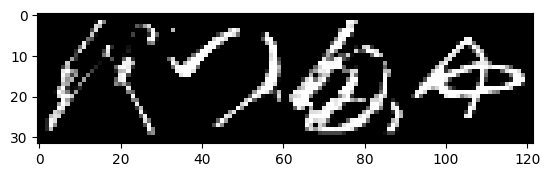

In [22]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

print(labels)
imshow(torchvision.utils.make_grid(images))

## 問

分類モデルのアーキテクチャを下図で与える。PyTorchで実装し、モデルの学習を行いなさい。

注意点：
- データセットについては上記で与えたように、訓練データとテストデータを使うこと。3分割して検証データを用意する必要はない。
- モデルは`nn.Module`のサブクラスとして定義すること。
- 畳み込み部分のpaddingは行わないこと。
- 損失関数とOptimizerは任意でよい。
- ミニバッチ学習を行うこと。
- 計算が終わるように、エポック数などは適宜調整してよい。精度が出るまで学習しなくてもよい。
- 各エポックごとに、訓練データ・テストデータ、それぞれに対してモデル性能を評価しなさい。

In [23]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [24]:
import torch.nn as nn

class neuralnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv2d1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=(5, 5), stride=1)
        self.conv2d2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=(5, 5), stride=1)
        self.relu = nn.ReLU()
        self.maxpooling = nn.MaxPool2d((2, 2))
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(160, 120)
        self.linear2 = nn.Linear(120, 60)
        self.linear3 = nn.Linear(60, 10)
        
    def forward(self, x):
        x = self.conv2d1(x)
        x = self.relu(x)
        x = self.maxpooling(x)
        x = self.conv2d2(x)
        x = self.relu(x)
        x = self.maxpooling(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)
        return x
    
m = neuralnet().to(device)
print(m)

neuralnet(
  (conv2d1): Conv2d(1, 5, kernel_size=(5, 5), stride=(1, 1))
  (conv2d2): Conv2d(5, 10, kernel_size=(5, 5), stride=(1, 1))
  (relu): ReLU()
  (maxpooling): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=160, out_features=120, bias=True)
  (linear2): Linear(in_features=120, out_features=60, bias=True)
  (linear3): Linear(in_features=60, out_features=10, bias=True)
)


In [25]:
correct, total = 0, 0
m.eval()
with torch.no_grad():
    for x, y in testloader:
        outputs = m(x.to(device))
        _, predicted = torch.max(outputs, 1)
        total += y.size(0)
        correct += (predicted == y.to(device)).sum().item()

correct /= total
print(f"正答率: {correct * 100}")    

正答率: 10.07


In [26]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(m.parameters(), lr=0.01)

In [27]:
def train(dataloader, m, loss_fn, optimizer):

    m.train()

    for _, (x, y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)
        
        pred = m(x)
        loss = loss_fn(pred, y.long())
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
def score(dataloader, m):
    size = len(dataloader.dataset)
    m.eval()
    correct = 0
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            pred = m(x)

            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    correct /= size
    return correct

In [29]:
epochs = 10
for t in range(epochs):
    train(trainloader, m, loss_fn, optimizer)
    print(f"Epoch {t+1}")
    print(f"訓練データ正答率: {score(trainloader, m) * 100}")
    print(f"テストデータ正答率: {score(testloader, m) * 100}")

Epoch 1
訓練データ正答率: 94.29166666666666
テストデータ正答率: 85.50999999999999
Epoch 2
訓練データ正答率: 94.93333333333334
テストデータ正答率: 87.4
Epoch 3
訓練データ正答率: 95.155
テストデータ正答率: 87.92
Epoch 4
訓練データ正答率: 95.22833333333334
テストデータ正答率: 87.51
Epoch 5
訓練データ正答率: 95.73333333333333
テストデータ正答率: 87.68
Epoch 6
訓練データ正答率: 95.38166666666666
テストデータ正答率: 88.02
Epoch 7
訓練データ正答率: 95.49499999999999
テストデータ正答率: 88.07000000000001
Epoch 8
訓練データ正答率: 95.83666666666667
テストデータ正答率: 88.44999999999999
Epoch 9
訓練データ正答率: 96.02166666666668
テストデータ正答率: 88.33
Epoch 10
訓練データ正答率: 95.75666666666666
テストデータ正答率: 88.42999999999999


In [30]:
correct, total = 0, 0
m.eval()
with torch.no_grad():
    for x, y in testloader:
        outputs = m(x.to(device))
        _, predicted = torch.max(outputs, 1)
        total += y.size(0)
        correct += (predicted == y.to(device)).sum().item()

correct /= total
print(f"正答率: {correct * 100}")    

正答率: 88.42999999999999


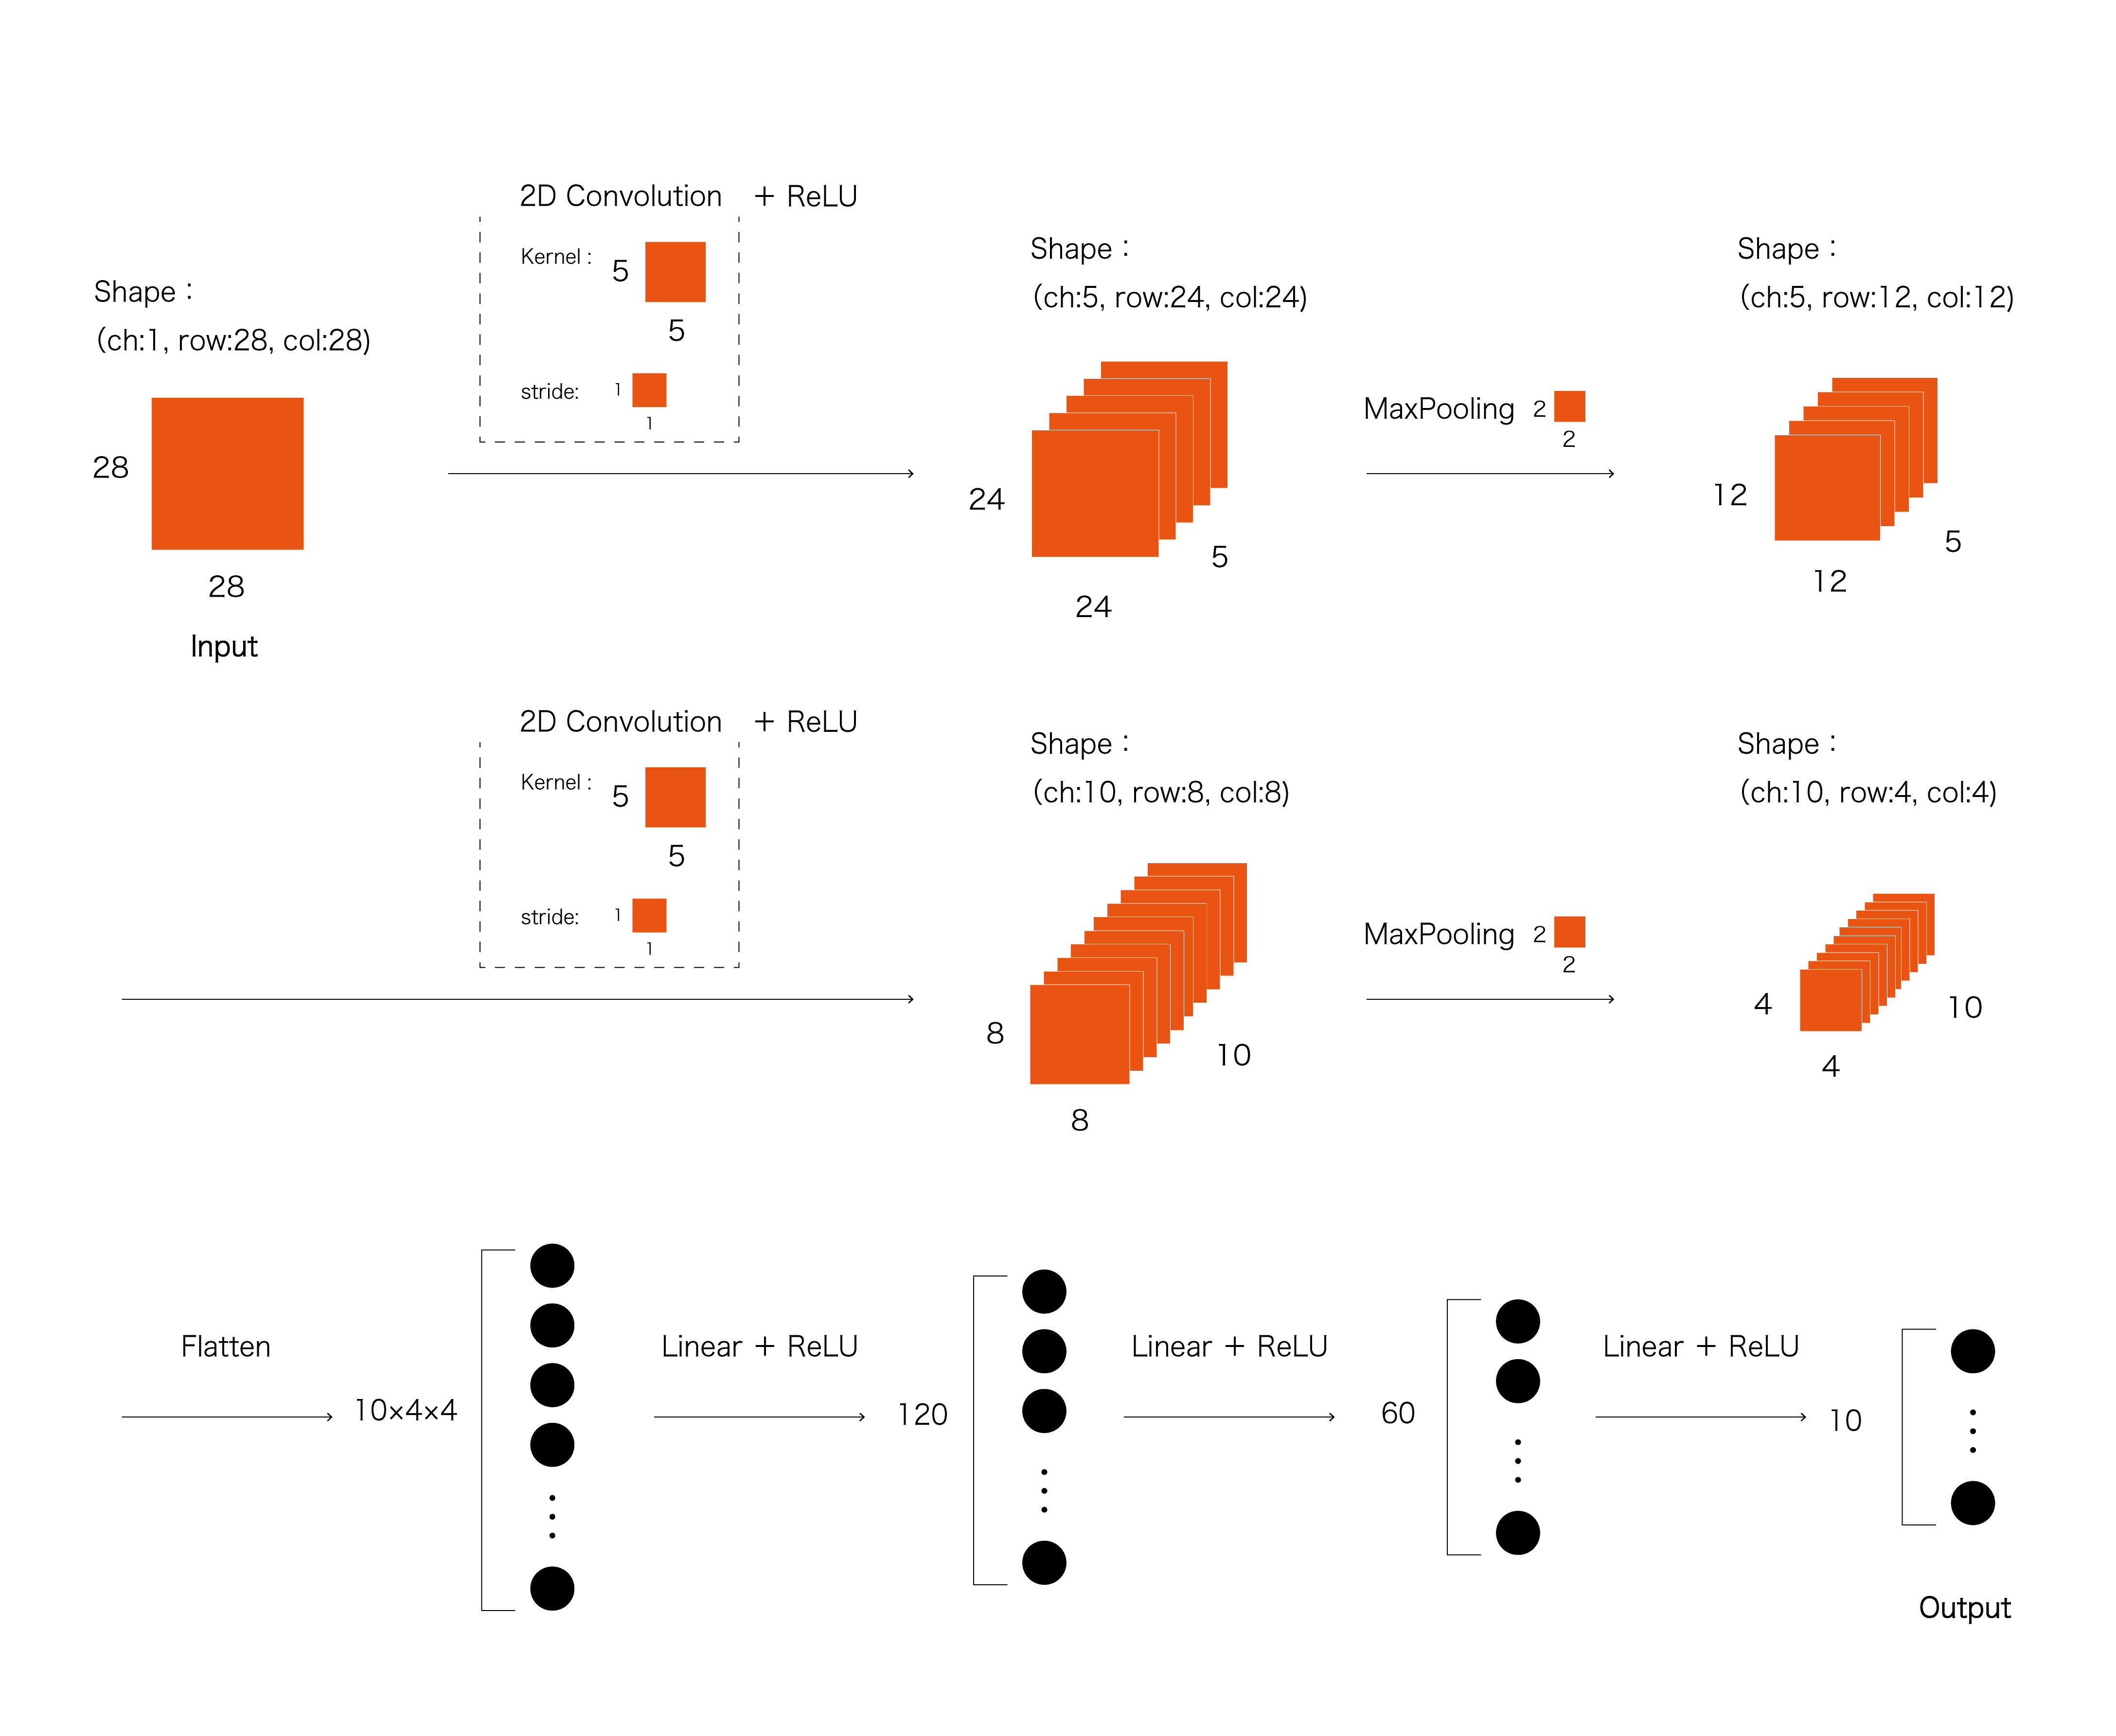

In [ ]:
from IPython import display

display.Image("test-deeplearning.png")

# Python

In [7]:
import seaborn as sns
import pandas as pd

In [15]:
df = sns.load_dataset("car_crashes")
df

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


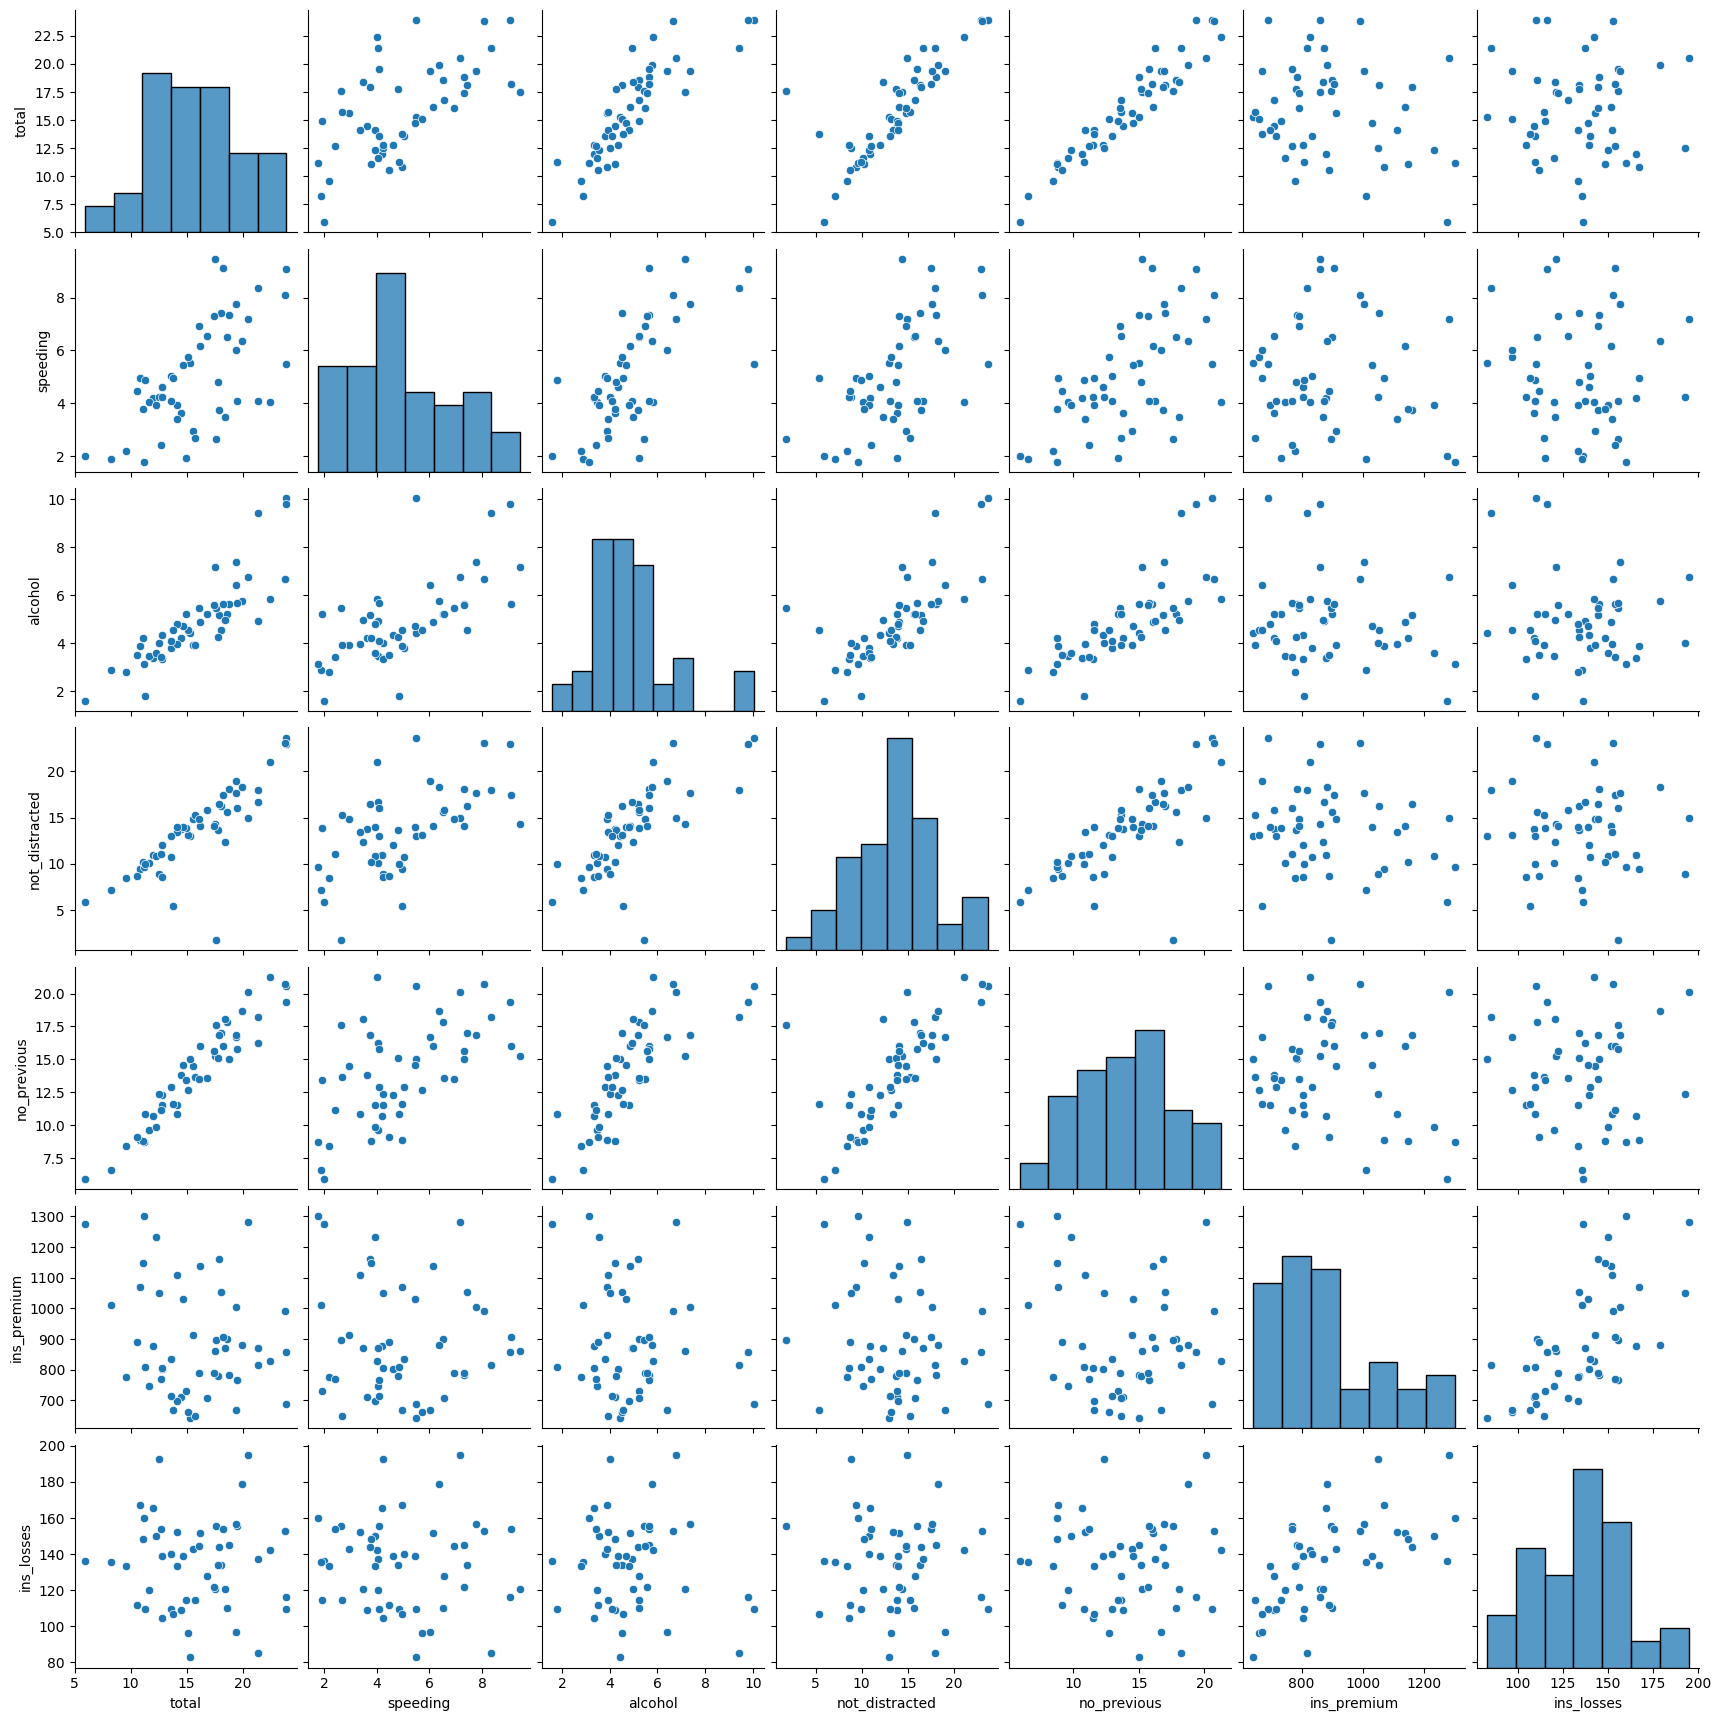

In [17]:
sns.pairplot(df)